<a href="https://colab.research.google.com/github/jazu1412/APACHE_BEAM/blob/main/flight_analysis_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight Delay Analysis: Exploratory Data Analysis

This notebook performs an exploratory data analysis on the Airline Delay Cause dataset, examining various aspects of flight delays and their causes.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Set plot style
plt.style.use('seaborn')
sns.set_palette("deep")

<ipython-input-1-2b1ccafe5d4b>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Data Loading and Initial Inspection

In [2]:
# Load the dataset
flight_data = pd.read_csv('Airline_Delay_Cause (1).csv')

# Display the first few rows
print(flight_data.head())

# Show basic information about the dataset
print(flight_data.info())

   year  month carrier       carrier_name airport  \
0  2023      8      9E  Endeavor Air Inc.     ABE   
1  2023      8      9E  Endeavor Air Inc.     ABY   
2  2023      8      9E  Endeavor Air Inc.     AEX   
3  2023      8      9E  Endeavor Air Inc.     AGS   
4  2023      8      9E  Endeavor Air Inc.     ALB   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         89.0       13.0   
1             Albany, GA: Southwest Georgia Regional         62.0       10.0   
2           Alexandria, LA: Alexandria International         62.0       10.0   
3        Augusta, GA: Augusta Regional at Bush Field         66.0       12.0   
4                   Albany, NY: Albany International         92.0       22.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        2.25        1.60  ...          0.0              5.99            2.0   
1        1.97        0.04  ...          

## Data Cleaning and Preprocessing

In [4]:

# Check for missing values
print(flight_data.isnull().sum())

# Handle missing values for numeric columns only
# Select numeric columns
numeric_columns = flight_data.select_dtypes(include=np.number).columns

# Fill missing values in numeric columns with their median
flight_data[numeric_columns] = flight_data[numeric_columns].fillna(flight_data[numeric_columns].median())

# Convert date columns to datetime
flight_data['date'] = pd.to_datetime(flight_data[['year', 'month']].assign(day=1))
flight_data.set_index('date', inplace=True)

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            240
arr_del15              443
carrier_ct             240
weather_ct             240
nas_ct                 240
security_ct            240
late_aircraft_ct       240
arr_cancelled          240
arr_diverted           240
arr_delay              240
carrier_delay          240
weather_delay          240
nas_delay              240
security_delay         240
late_aircraft_delay    240
dtype: int64


## Descriptive Statistics

In [5]:
# Display summary statistics
print(flight_data.describe())

                year          month    arr_flights      arr_del15  \
count  171666.000000  171666.000000  171666.000000  171666.000000   
mean     2018.551361       6.493633     362.161436      66.306817   
std         2.890006       3.440908     992.248838     179.326421   
min      2013.000000       1.000000       1.000000       0.000000   
25%      2016.000000       4.000000      50.000000       6.000000   
50%      2019.000000       7.000000     100.000000      17.000000   
75%      2021.000000       9.000000     249.000000      47.000000   
max      2023.000000      12.000000   21977.000000    4176.000000   

          carrier_ct     weather_ct         nas_ct    security_ct  \
count  171666.000000  171666.000000  171666.000000  171666.000000   
mean       20.776488       2.247760      19.359517       0.156877   
std        50.282869       7.309464      61.634827       0.716927   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.160000       0.0000

## Categorical Data Analysis

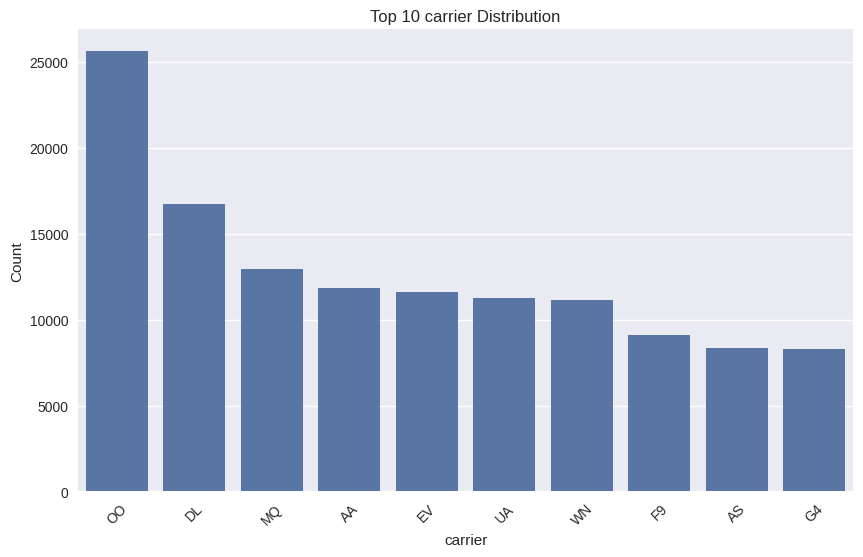

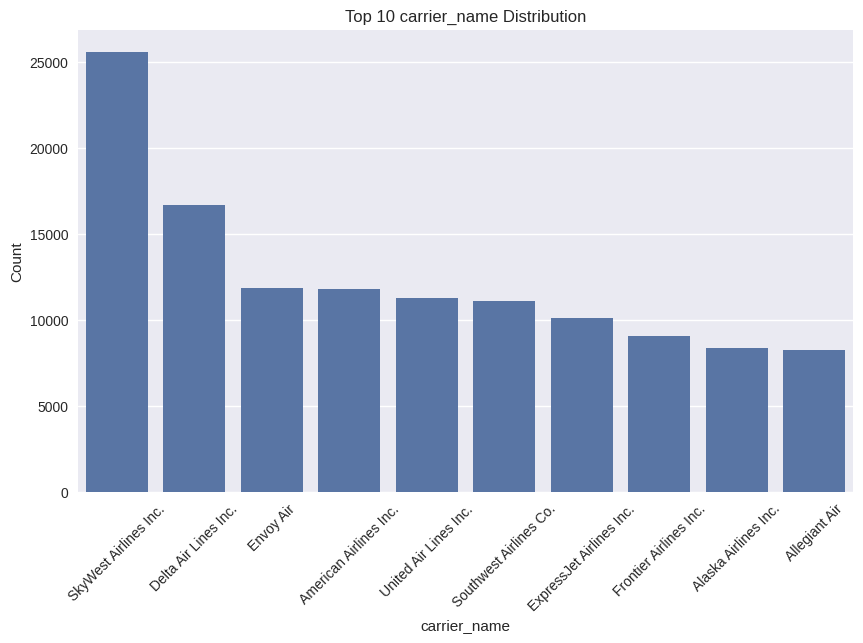

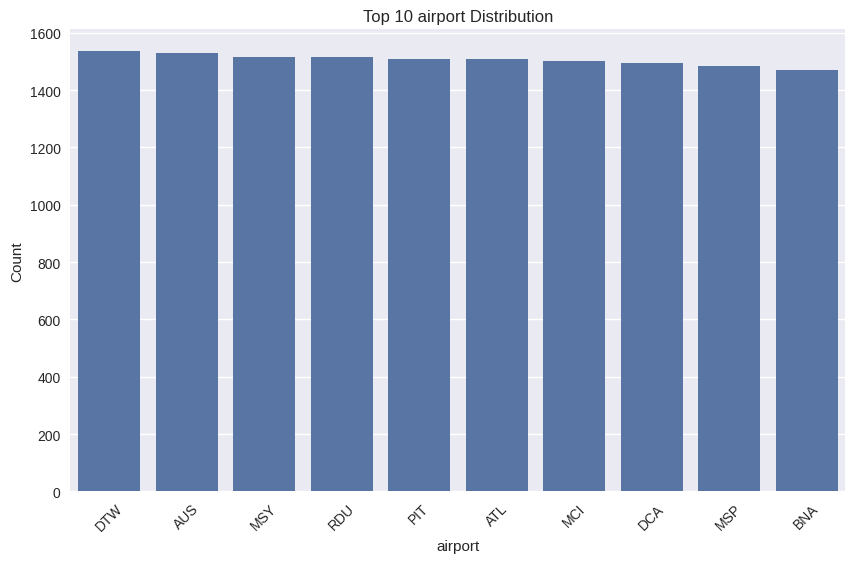

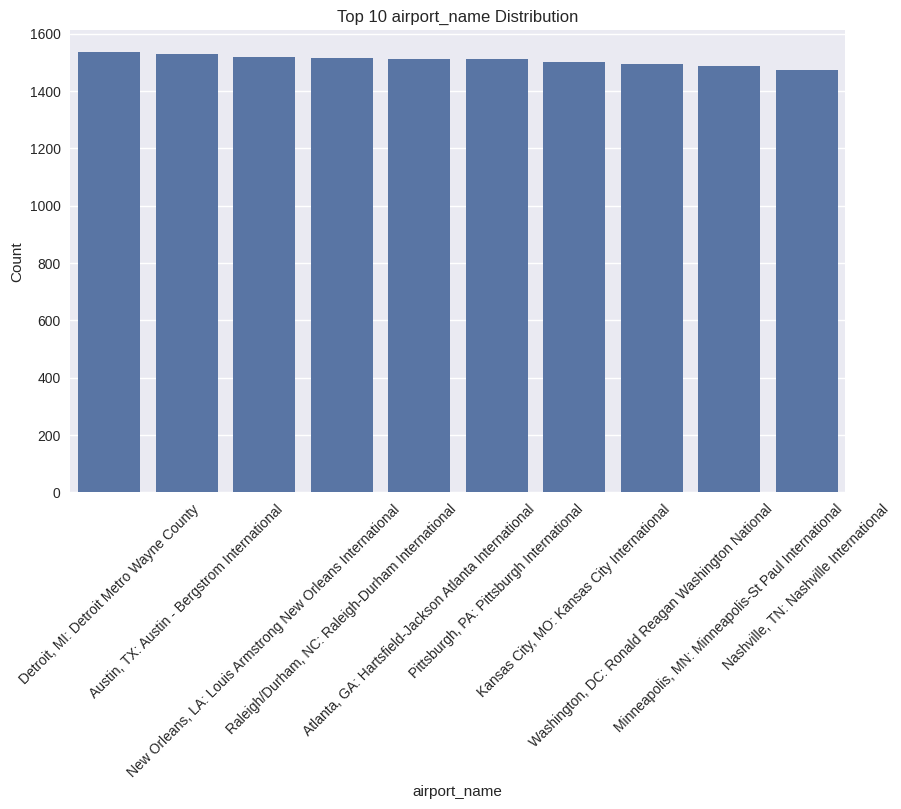

In [6]:
categorical_cols = ['carrier', 'carrier_name', 'airport', 'airport_name']

for col in categorical_cols:
    top_categories = flight_data[col].value_counts().nlargest(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_categories.index, y=top_categories.values)
    plt.title(f'Top 10 {col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

## Numerical Data Analysis

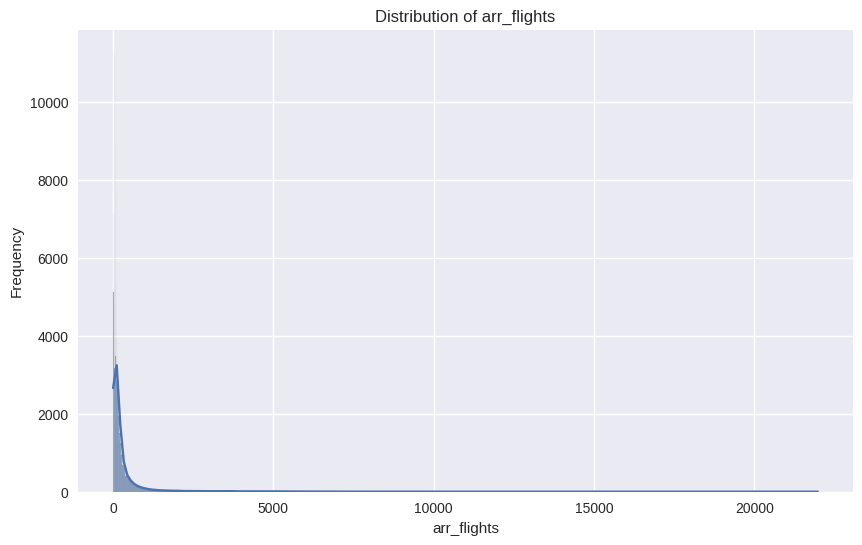

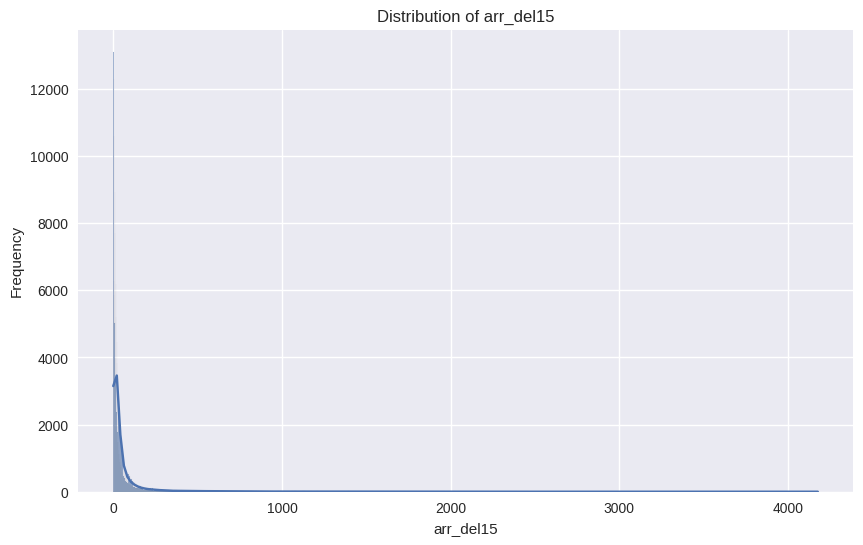

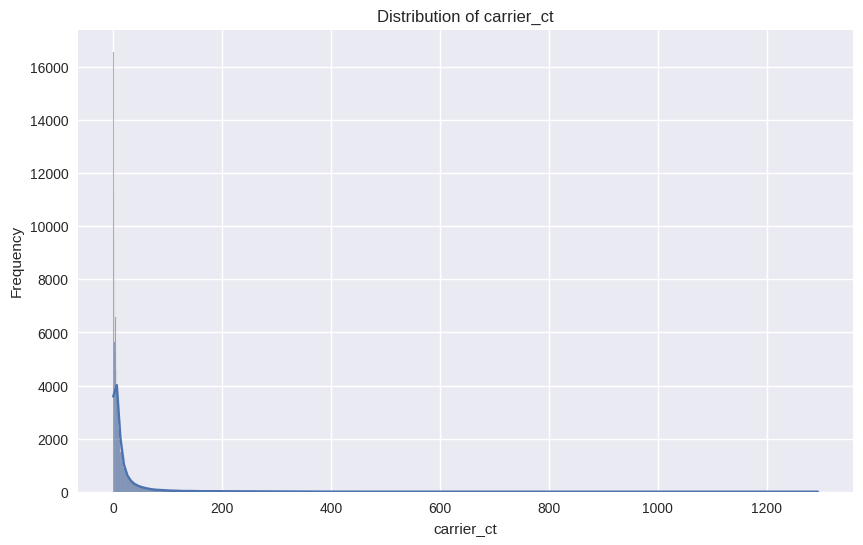

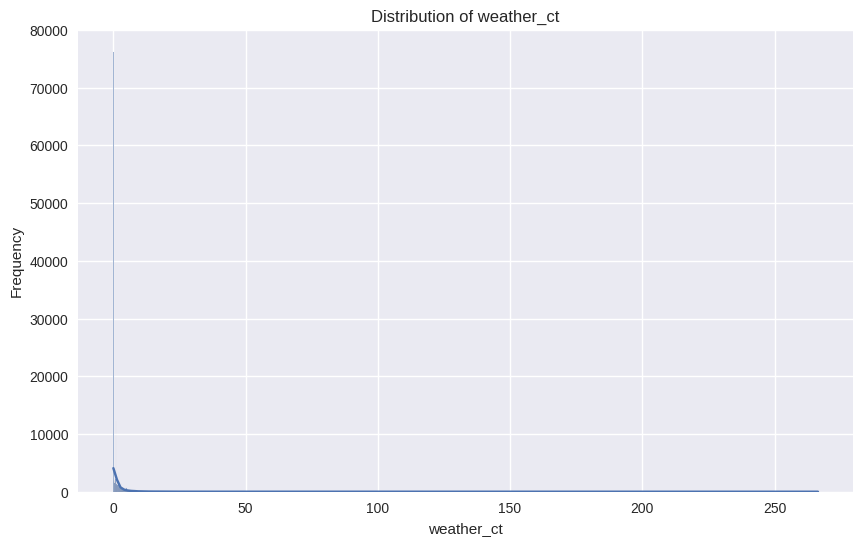

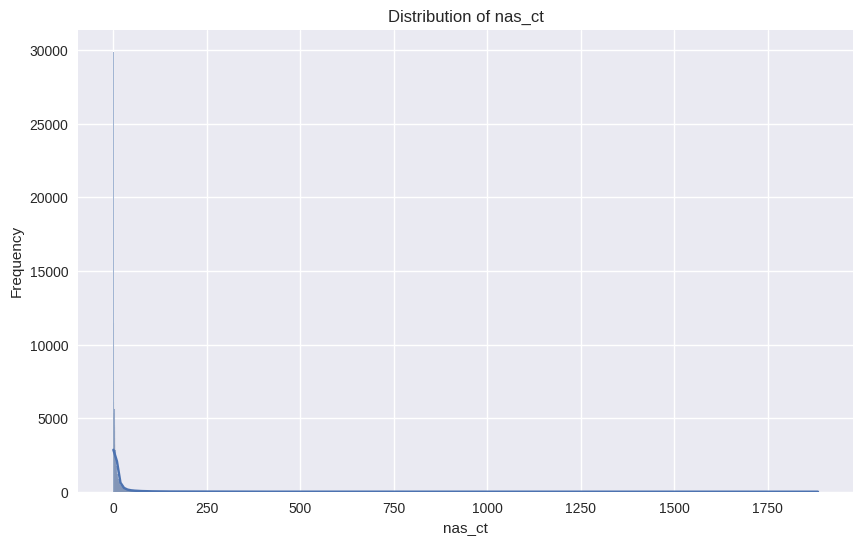

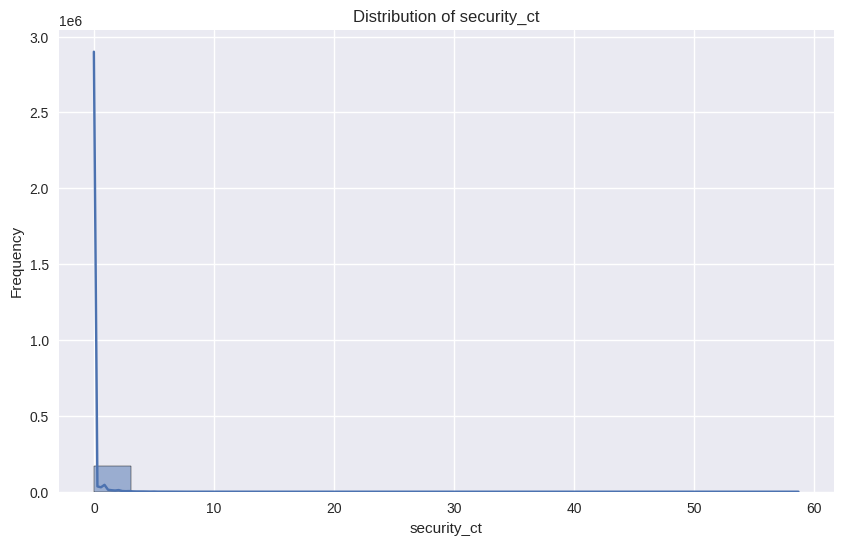

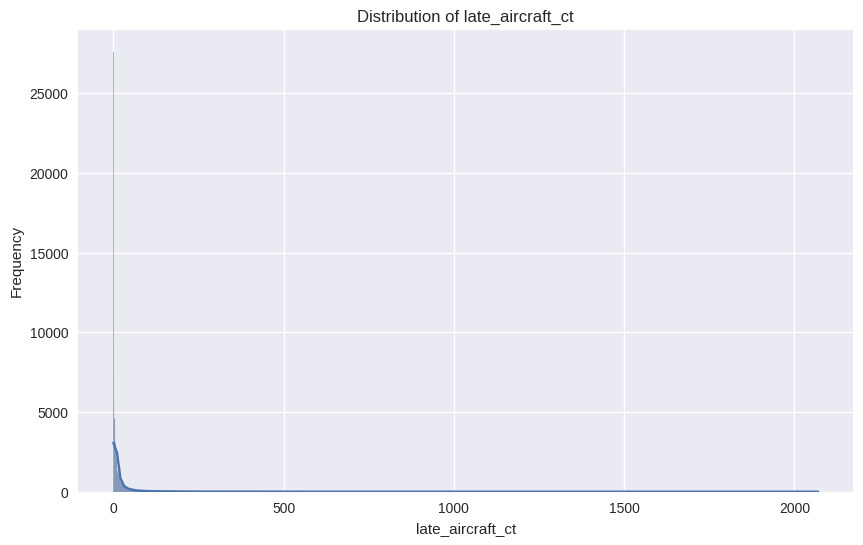

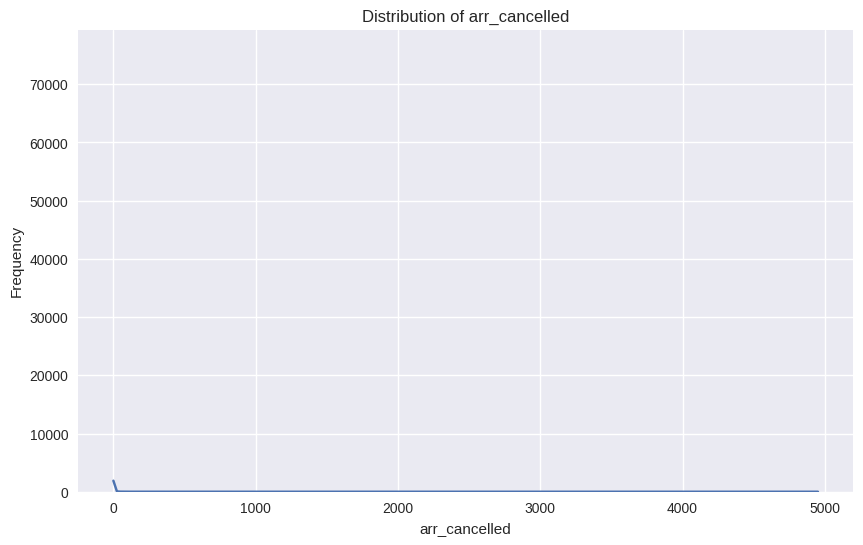

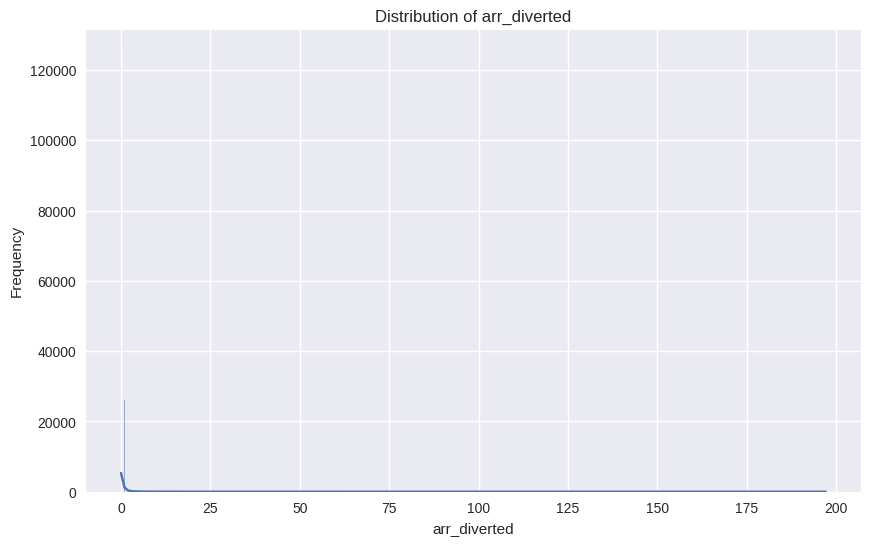

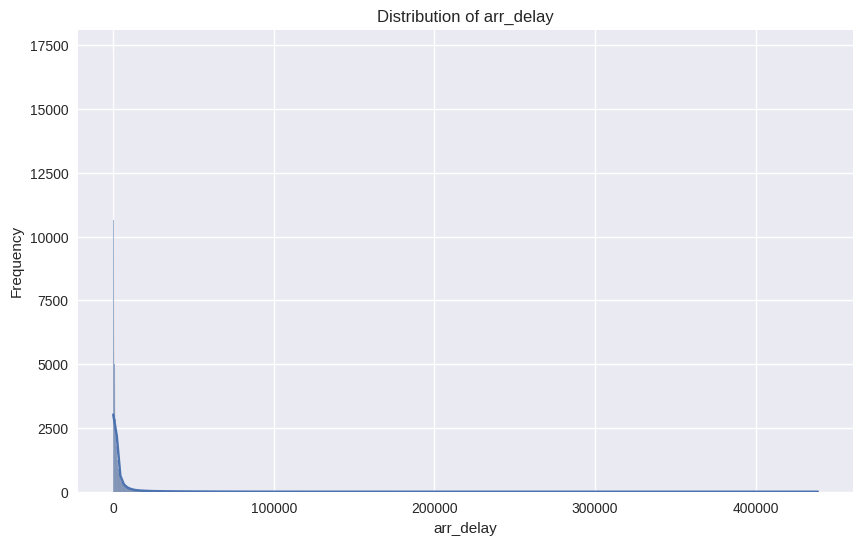

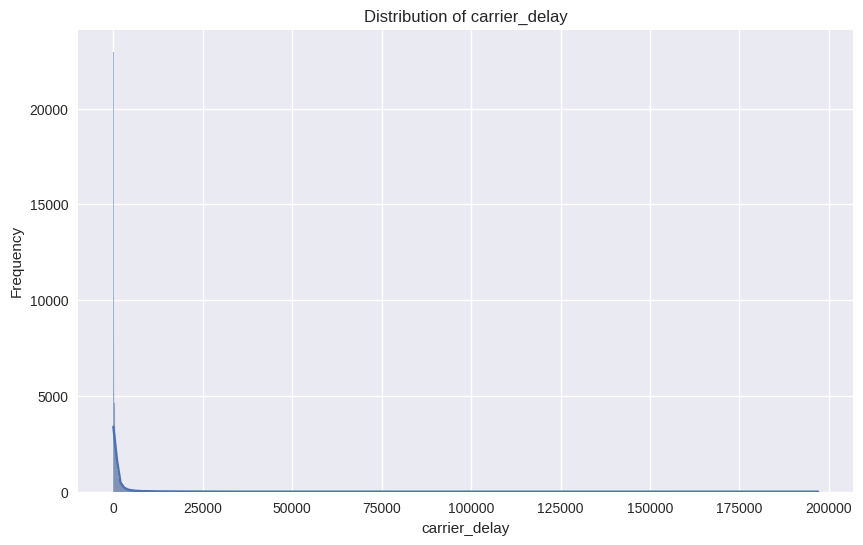

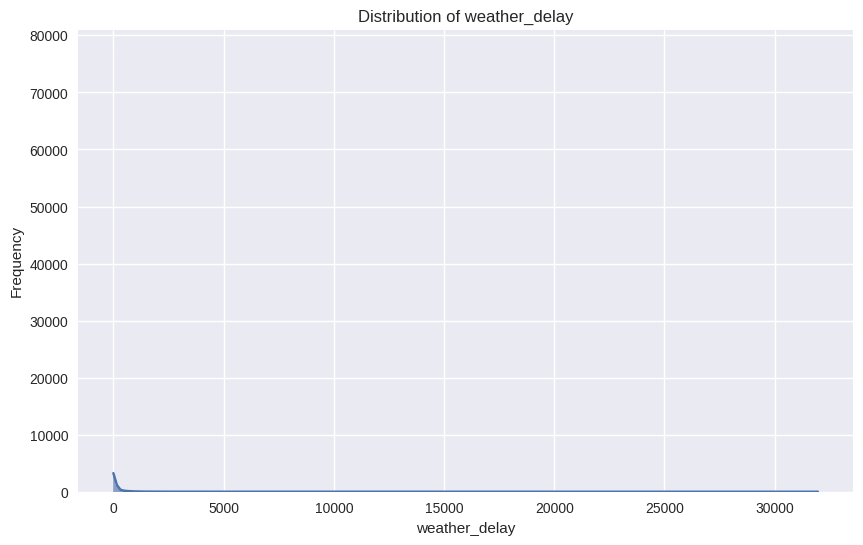

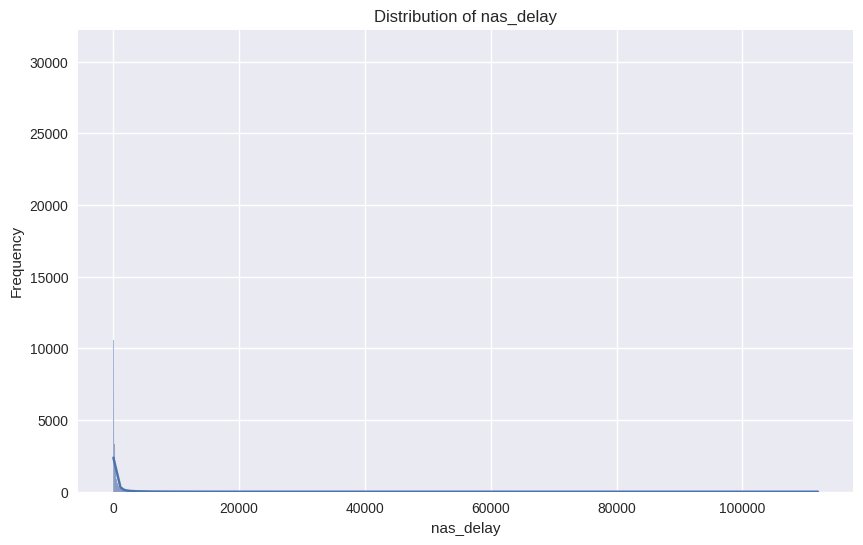

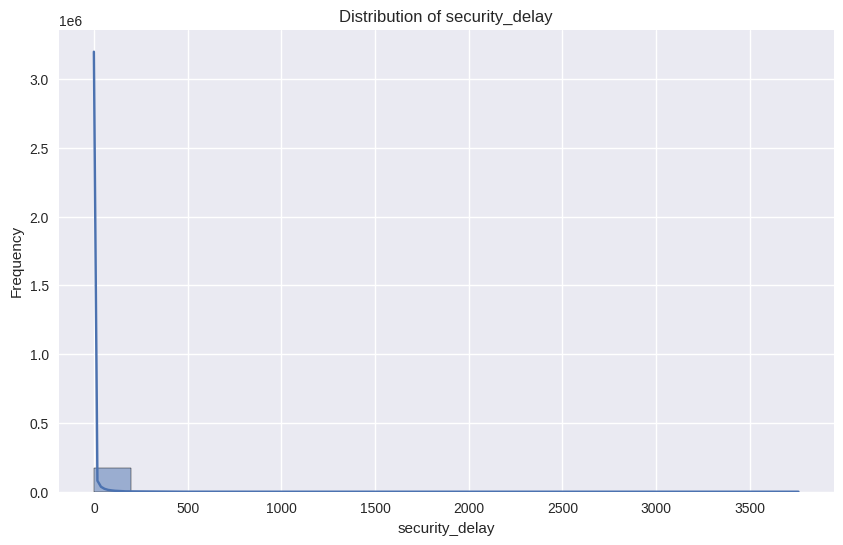

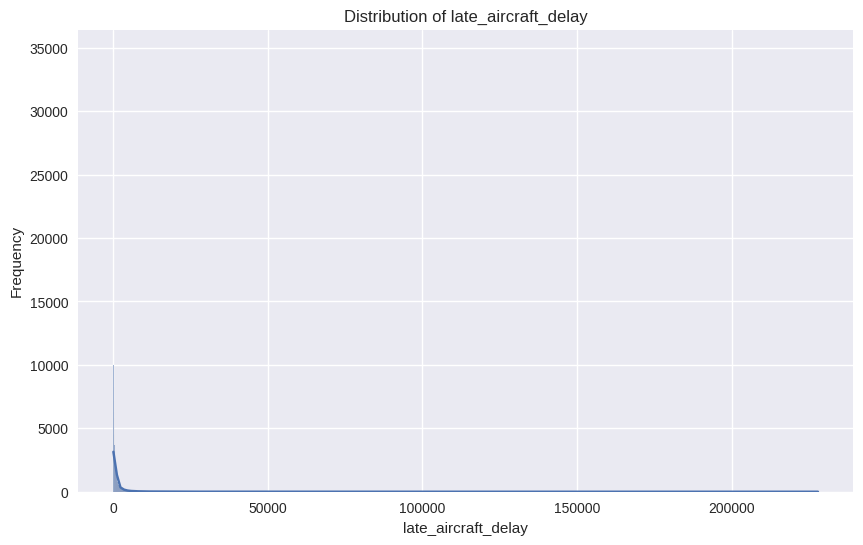

In [7]:
numerical_cols = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
                  'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
                  'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
                  'security_delay', 'late_aircraft_delay']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(flight_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Correlation Analysis

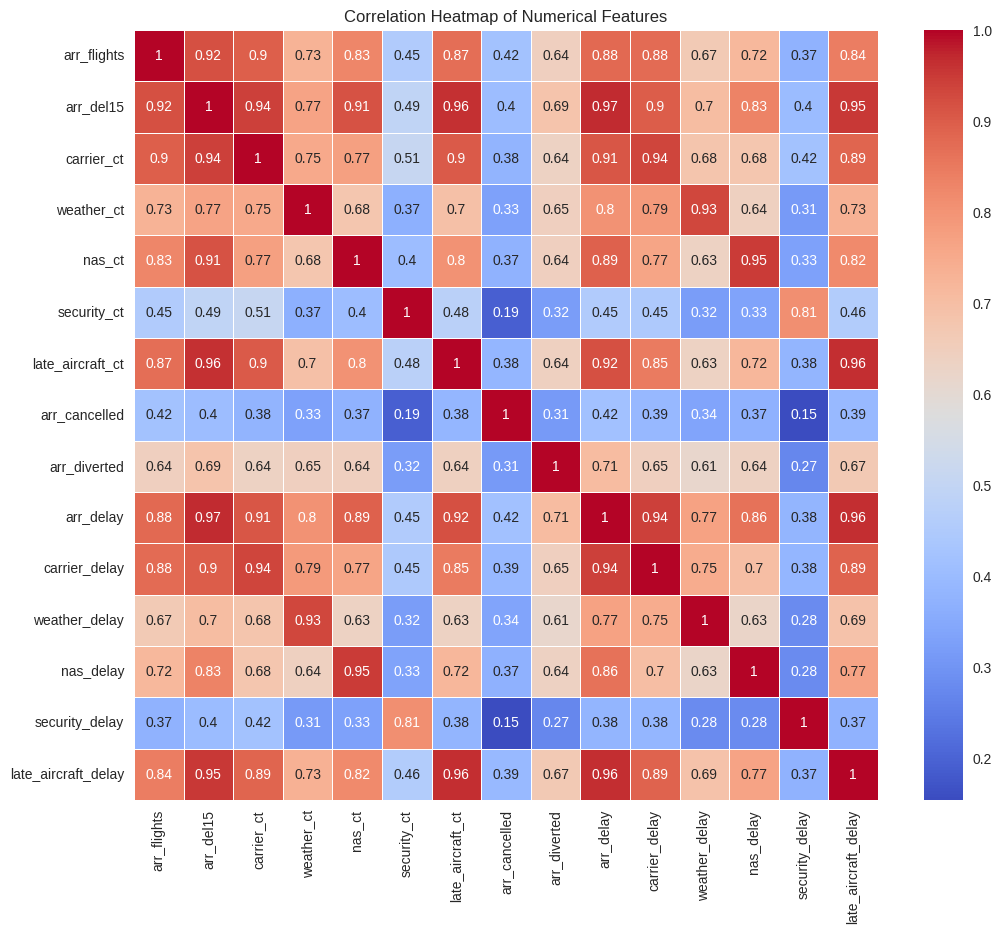

In [8]:
# Compute correlation matrix
corr_matrix = flight_data[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Time Series Analysis

<ipython-input-9-df0d7b30ec00>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = flight_data.resample('M').sum()


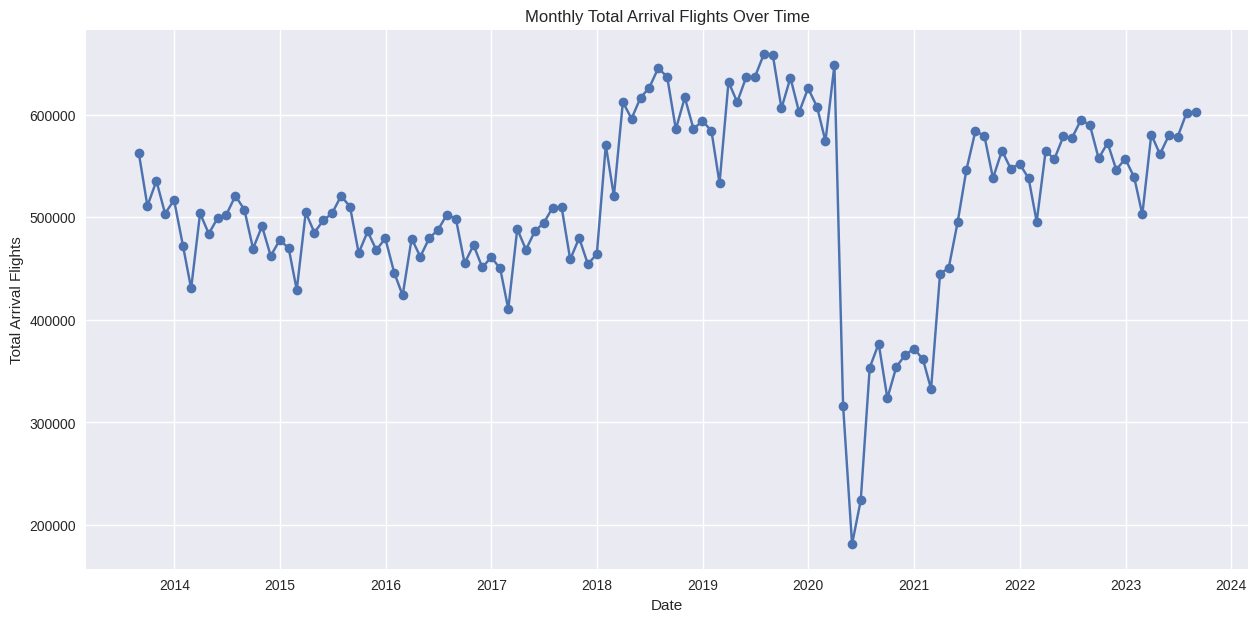

<ipython-input-9-df0d7b30ec00>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = flight_data.resample('Y').sum()


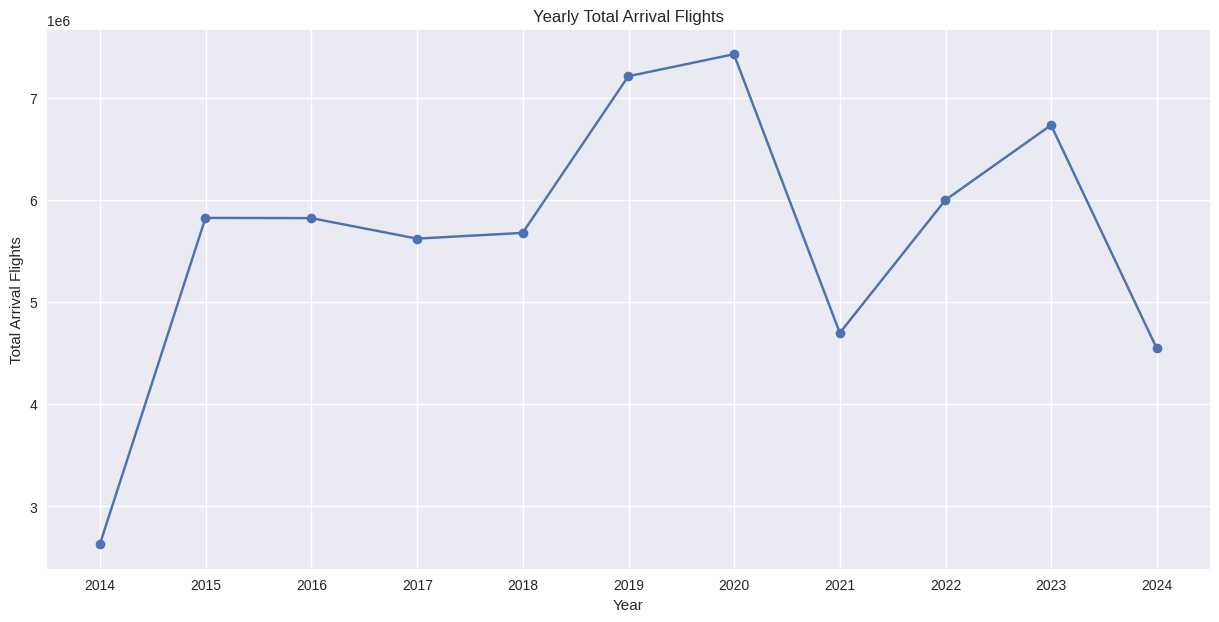

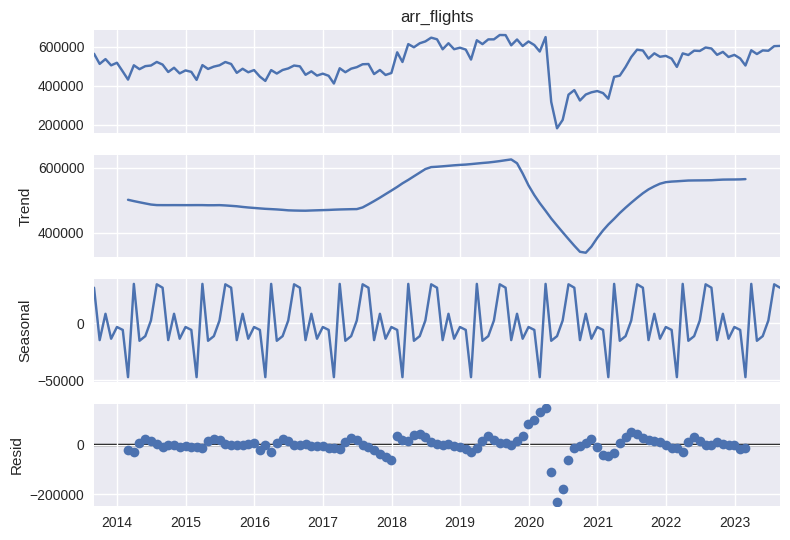

In [9]:
# Monthly trend
monthly_data = flight_data.resample('M').sum()
plt.figure(figsize=(15, 7))
plt.plot(monthly_data.index, monthly_data['arr_flights'], marker='o')
plt.title('Monthly Total Arrival Flights Over Time')
plt.xlabel('Date')
plt.ylabel('Total Arrival Flights')
plt.show()

# Yearly trend
yearly_data = flight_data.resample('Y').sum()
plt.figure(figsize=(15, 7))
plt.plot(yearly_data.index, yearly_data['arr_flights'], marker='o')
plt.title('Yearly Total Arrival Flights')
plt.xlabel('Year')
plt.ylabel('Total Arrival Flights')
plt.show()

# Seasonal decomposition
decomposition = seasonal_decompose(monthly_data['arr_flights'], model='additive', period=12)
decomposition.plot()
plt.tight_layout()
plt.show()

## Delay Cause Analysis

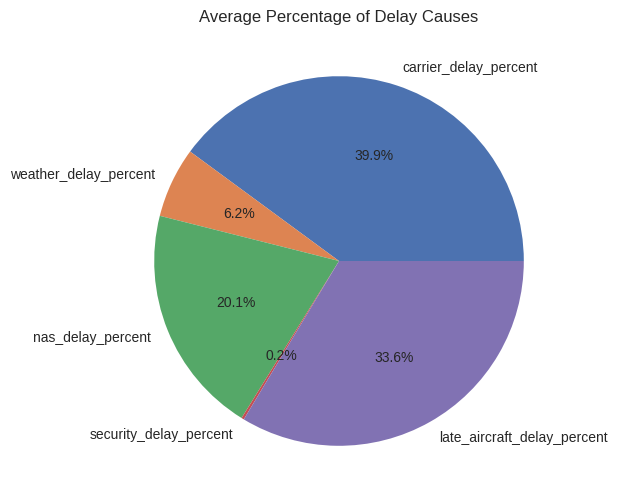

In [10]:
delay_causes = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Calculate total delays
flight_data['total_delay'] = flight_data[delay_causes].sum(axis=1)

# Calculate percentage of each delay cause
for cause in delay_causes:
    flight_data[f'{cause}_percent'] = flight_data[cause] / flight_data['total_delay'] * 100

# Plot average delay cause percentages
avg_delay_percents = flight_data[[f'{cause}_percent' for cause in delay_causes]].mean()

plt.figure(figsize=(10, 6))
avg_delay_percents.plot(kind='pie', autopct='%1.1f%%')
plt.title('Average Percentage of Delay Causes')
plt.ylabel('')
plt.show()

In [35]:
import pandas as pd
import json
from IPython.display import display, HTML

# Load your flight delay dataset (replace the file path if necessary)
from google.colab import files
uploaded = files.upload()

# Assuming the uploaded file is 'Airline_Delay_Cause.csv'
flight_data = pd.read_csv('Airline_Delay_Cause (1).csv')

# Calculate the average delay per carrier
carrier_avg_delay = flight_data.groupby('carrier', as_index=False).agg(avgDelay=('arr_delay', 'mean'))

# Convert the data to a list of dictionaries for D3
carrier_data_list = carrier_avg_delay.to_dict(orient='records')

# Convert the data to JSON for embedding in the HTML
carrier_data_json = json.dumps(carrier_data_list)


Saving Airline_Delay_Cause (1).csv to Airline_Delay_Cause (1) (2).csv


In [38]:
from IPython.display import display, HTML

# Define the HTML structure with D3.js code
html_code = f'''
<!DOCTYPE html>
<html>
<head>
    <title>D3.js Flight Delay Visualization</title>
    <script src="https://d3js.org/d3.v6.min.js"></script>
    <style>
        .bar {{
            fill: steelblue;
        }}
        .axis-label {{
            font-size: 12px;
        }}
        .tooltip {{
            position: absolute;
            text-align: center;
            width: 80px;
            height: 28px;
            padding: 2px;
            font: 12px sans-serif;
            background: lightsteelblue;
            border: 0px;
            border-radius: 8px;
            pointer-events: none;
        }}
    </style>
</head>
<body>
    <svg width="960" height="500"></svg>
    <script>
        // Use actual data from the Python environment
        const data = {carrier_data_json};

        // Define the margin, width, and height for the SVG
        const margin = {{top: 20, right: 30, bottom: 40, left: 60}},
              width = 960 - margin.left - margin.right,
              height = 500 - margin.top - margin.bottom;

        // Create the SVG container
        const svg = d3.select("svg")
                      .attr("width", width + margin.left + margin.right)
                      .attr("height", height + margin.top + margin.bottom);

        // Append a group element and apply the transformation
        const g = svg.append("g")
                     .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

        // Set up the x and y scales
        const x = d3.scaleBand()
                    .domain(data.map(d => d.carrier))
                    .range([0, width])
                    .padding(0.1);

        const y = d3.scaleLinear()
                    .domain([0, d3.max(data, d => d.avgDelay)])
                    .nice()
                    .range([height, 0]);

        // Tooltip setup
        const tooltip = d3.select("body").append("div")
            .attr("class", "tooltip")
            .style("opacity", 0);

        // Create bars with tooltip interaction
        g.selectAll(".bar")
         .data(data)
         .enter().append("rect")
         .attr("class", "bar")
         .attr("x", d => x(d.carrier))
         .attr("y", d => y(d.avgDelay))
         .attr("width", x.bandwidth())
         .attr("height", d => height - y(d.avgDelay))
         .on("mouseover", (event, d) => {{
             tooltip.transition()
                    .duration(200)
                    .style("opacity", .9);
             tooltip.html(`Carrier: ${{d.carrier}}<br>Avg Delay: ${{d.avgDelay.toFixed(2)}} mins`)
                    .style("left", (event.pageX + 5) + "px")
                    .style("top", (event.pageY - 28) + "px");
         }})
         .on("mouseout", () => {{
             tooltip.transition()
                    .duration(500)
                    .style("opacity", 0);
         }});

        // X Axis
        g.append("g")
         .attr("class", "x-axis")
         .attr("transform", "translate(0," + height + ")")
         .call(d3.axisBottom(x));

        // Y Axis
        g.append("g")
         .attr("class", "y-axis")
         .call(d3.axisLeft(y));

        // X Axis Label
        svg.append("text")
           .attr("class", "axis-label")
           .attr("transform", "translate(" + ((width + margin.left + margin.right) / 2) + "," + (height + margin.top + margin.bottom - 5) + ")")
           .style("text-anchor", "middle")
           .text("Carrier");

        // Y Axis Label
        svg.append("text")
           .attr("class", "axis-label")
           .attr("transform", "rotate(-90)")
           .attr("y", margin.left / 4)
           .attr("x", 0 - (height / 2) - margin.top)
           .attr("dy", "1em")
           .style("text-anchor", "middle")
           .text("Average Delay (minutes)");
    </script>
</body>
</html>
'''

# Display the HTML
display(HTML(html_code))



## Conclusion

This notebook has conducted a comprehensive exploratory data analysis on the Airline Delay Cause dataset. We've examined the distribution of categorical and numerical variables, analyzed correlations between different features, performed time series analysis to understand trends and seasonality in flight data, and investigated the causes of delays.

